# import all library

In [4]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import sklearn 

In [6]:
from nsepy import get_history
from datetime import date 
from datetime import datetime, timedelta

# Import company name

In [7]:
comp_name = pd.read_csv('comp_name.csv')
comp_name = comp_name["Symbol"]
comp_name

0        3MINDIA
1     ADANIGREEN
2     ADANIPORTS
3     ADANITRANS
4          ALKEM
         ...    
92           UPL
93          VEDL
94     WHIRLPOOL
95         WIPRO
96       YESBANK
Name: Symbol, Length: 97, dtype: object

# Try predict model on one company

In [8]:
data_tcs = get_history(symbol="TCS" ,  start=datetime.today() - timedelta(1000), end=datetime.today())

In [9]:
data_tcs

Symbol Series  Prev Close     Open     High      Low     Last  \
Date                                                                       
2019-09-13    TCS     EQ     2133.60  2135.00  2157.95  2115.55  2143.00   
2019-09-16    TCS     EQ     2141.95  2159.95  2173.40  2126.40  2150.00   
2019-09-17    TCS     EQ     2150.00  2154.95  2156.55  2105.60  2126.40   
2019-09-18    TCS     EQ     2122.65  2126.40  2142.95  2113.15  2141.15   
2019-09-19    TCS     EQ     2138.55  2135.00  2135.80  2091.00  2096.90   
...           ...    ...         ...      ...      ...      ...      ...   
2022-06-03    TCS     EQ     3423.00  3459.40  3477.30  3431.20  3439.50   
2022-06-06    TCS     EQ     3440.15  3418.00  3453.00  3377.15  3432.95   
2022-06-07    TCS     EQ     3430.95  3401.05  3418.85  3356.00  3360.00   
2022-06-08    TCS     EQ     3362.70  3380.15  3413.95  3346.50  3390.40   
2022-06-09    TCS     EQ     3404.15  3385.00  3437.00  3353.10  3434.10   

              Close     VWAP   Volume      Turnover  Trades  \
Date                                                          
2019-09-13  2141.95  2135.83  2291174  4.893564e+14  138321   
2019-09-16  2150.00  2151.17  2597948  5.588631e+14  151943   
2019-09-17  2122.65  2123.78  2796530  5.939218e+14  121706   
2019-09-18  2138.55  2133.02  1454663  3.102821e+14   94064   
2019-09-19  2101.95  2103.74  1652691  3.476828e+14  101537   
...             ...      ...      ...           ...     ...   
2022-06-03  3440.15  3461.63  1913622  6.624247e+14  100866   
2022-06-06  3430.95  3418.11  1084210  3.705944e+14   73792   
2022-06-07  3362.70  3375.14  2308256  7.790697e+14   97752   
2022-06-08  3404.15  3380.99  2185707  7.389860e+14  108659   
2022-06-09  3427.10  3407.19  1279197  4.358469e+14   93783   

            Deliverable Volume  %Deliverble  
Date                                         
2019-09-13              873724       0.3813  
2019-09-16             1165596       0.4487  
2019-09-17             1594628       0.5702  
2019-09-18              674870       0.4639  
2019-09-19              791932       0.4792  
...                        ...          ...  
2022-06-03             1116753       0.5836  
2022-06-06              538450       0.4966  
2022-06-07             1498669       0.6493  
2022-06-08             1330224       0.6086  
2022-06-09              696532       0.5445  

[681 rows x 14 columns]

In [10]:
# define function to find useful data column only
def change_po_ne(x):
    if x>=0:
        return 1
    else :
        return 0

In [11]:
def useful_data(name,a):
    data = get_history(symbol= name ,  start=datetime.today() - timedelta(a), end=datetime.today())
    data1 =data.drop([ "Symbol","Series","Turnover","Trades","Deliverable Volume" ], axis = 1)
    data1["%change"] = ((data1["Close"]-data["Open"])/data["Open"])*100
    data1["change"] = data1["%change"].apply(change_po_ne)
    data1 = data1.drop(["%change"], axis  =1)
    
    return data1

In [33]:
data_trial = useful_data('TCS',1000)
data_trial

Prev Close     Open     High      Low     Last    Close     VWAP  \
Date                                                                           
2019-09-13     2133.60  2135.00  2157.95  2115.55  2143.00  2141.95  2135.83   
2019-09-16     2141.95  2159.95  2173.40  2126.40  2150.00  2150.00  2151.17   
2019-09-17     2150.00  2154.95  2156.55  2105.60  2126.40  2122.65  2123.78   
2019-09-18     2122.65  2126.40  2142.95  2113.15  2141.15  2138.55  2133.02   
2019-09-19     2138.55  2135.00  2135.80  2091.00  2096.90  2101.95  2103.74   
...                ...      ...      ...      ...      ...      ...      ...   
2022-06-03     3423.00  3459.40  3477.30  3431.20  3439.50  3440.15  3461.63   
2022-06-06     3440.15  3418.00  3453.00  3377.15  3432.95  3430.95  3418.11   
2022-06-07     3430.95  3401.05  3418.85  3356.00  3360.00  3362.70  3375.14   
2022-06-08     3362.70  3380.15  3413.95  3346.50  3390.40  3404.15  3380.99   
2022-06-09     3404.15  3385.00  3437.00  3353.10  3434.10  3427.10  3407.19   

             Volume  %Deliverble  change  
Date                                      
2019-09-13  2291174       0.3813       1  
2019-09-16  2597948       0.4487       0  
2019-09-17  2796530       0.5702       0  
2019-09-18  1454663       0.4639       1  
2019-09-19  1652691       0.4792       0  
...             ...          ...     ...  
2022-06-03  1913622       0.5836       0  
2022-06-06  1084210       0.4966       1  
2022-06-07  2308256       0.6493       0  
2022-06-08  2185707       0.6086       1  
2022-06-09  1279197       0.5445       1  

[681 rows x 10 columns]

In [13]:
y = data_trial["change"]
y

Date
2019-09-13    1
2019-09-16    0
2019-09-17    0
2019-09-18    1
2019-09-19    0
             ..
2022-06-03    0
2022-06-06    1
2022-06-07    0
2022-06-08    1
2022-06-09    1
Name: change, Length: 681, dtype: int64

In [14]:
y = y.iloc[1:]
y

Date
2019-09-16    0
2019-09-17    0
2019-09-18    1
2019-09-19    0
2019-09-20    0
             ..
2022-06-03    0
2022-06-06    1
2022-06-07    0
2022-06-08    1
2022-06-09    1
Name: change, Length: 680, dtype: int64

In [15]:
x = data_trial.drop(["change"] , axis =1)
x = x.iloc[:-1]
x

Prev Close     Open     High      Low     Last    Close     VWAP  \
Date                                                                           
2019-09-13     2133.60  2135.00  2157.95  2115.55  2143.00  2141.95  2135.83   
2019-09-16     2141.95  2159.95  2173.40  2126.40  2150.00  2150.00  2151.17   
2019-09-17     2150.00  2154.95  2156.55  2105.60  2126.40  2122.65  2123.78   
2019-09-18     2122.65  2126.40  2142.95  2113.15  2141.15  2138.55  2133.02   
2019-09-19     2138.55  2135.00  2135.80  2091.00  2096.90  2101.95  2103.74   
...                ...      ...      ...      ...      ...      ...      ...   
2022-06-02     3355.20  3355.00  3432.00  3346.30  3425.00  3423.00  3406.45   
2022-06-03     3423.00  3459.40  3477.30  3431.20  3439.50  3440.15  3461.63   
2022-06-06     3440.15  3418.00  3453.00  3377.15  3432.95  3430.95  3418.11   
2022-06-07     3430.95  3401.05  3418.85  3356.00  3360.00  3362.70  3375.14   
2022-06-08     3362.70  3380.15  3413.95  3346.50  3390.40  3404.15  3380.99   

             Volume  %Deliverble  
Date                              
2019-09-13  2291174       0.3813  
2019-09-16  2597948       0.4487  
2019-09-17  2796530       0.5702  
2019-09-18  1454663       0.4639  
2019-09-19  1652691       0.4792  
...             ...          ...  
2022-06-02  2657939       0.5884  
2022-06-03  1913622       0.5836  
2022-06-06  1084210       0.4966  
2022-06-07  2308256       0.6493  
2022-06-08  2185707       0.6086  

[680 rows x 9 columns]

In [16]:
from sklearn.model_selection import train_test_split
x_train , x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 10)

In [17]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(fit_intercept=True,max_iter=10000)
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.5882352941176471

In [18]:
y_test_pre = lr_clf.predict(x_test)
y_test_pre

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [19]:
y_test

Date
2019-12-10    0
2020-05-15    0
2022-04-19    0
2020-08-31    1
2020-07-03    1
             ..
2021-04-08    1
2020-05-21    1
2021-01-06    0
2020-04-28    0
2022-03-15    0
Name: change, Length: 204, dtype: int64

In [20]:
from sklearn.metrics import confusion_matrix ,plot_confusion_matrix
import seaborn as sn

In [21]:
c= confusion_matrix(y_test_pre, y_test)
c

array([[109,  79],
       [  5,  11]], dtype=int64)

C:\Users\SANDEEP KUMAR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


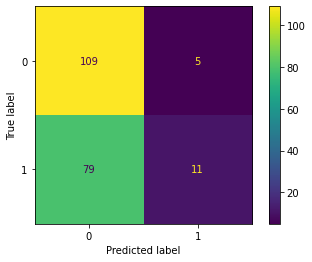

In [22]:
plot_confusion_matrix(lr_clf,x_test , y_test)

In [46]:
data_final = pd.DataFrame(columns=['name', 'predict','%accurate'])

# NOw time to apply for all company

In [47]:
for name in comp_name:
    print(name)
    data_f = useful_data(name,1000)
    y_f = data_f["change"]
    y_f= y_f.iloc[1:]
    x_f = data_f.drop(["change"] , axis =1)
    x_f= x_f.iloc[:-1]
    x_train_f , x_test_f,y_train_f,y_test_f = train_test_split(x_f,y_f,test_size = 0.3,random_state = 10)
    lr_clf_f = LogisticRegression(fit_intercept=True,max_iter=10000)
    lr_clf_f.fit(x_train_f,y_train_f)
    score = lr_clf_f.score(x_test_f,y_test_f)
    
    
    data_yes = useful_data(name , 0)
    data_yes_x = data_f.drop(["change"] , axis =1)
    pre = lr_clf.predict(data_yes_x)[0]
#     print(pre)
    df2 = {'name': name, 'predict': pre, '%accurate': score*100}
    data_final = data_final.append(df2, ignore_index = True)
    
  
   
    

    
    

3MINDIA
ADANIGREEN
ADANIPORTS
ADANITRANS
ALKEM
AMBUJACEM
ASIANPAINT
AUROPHARMA
AXISBANK
BAJAJ-AUTO
BAJAJFINSV
BAJFINANCE
BANDHANBNK
BANKBARODA
BERGEPAINT
BHARTIARTL
BIOCON
BOSCHLTD
BPCL
BRITANNIA
CIPLA
COALINDIA
COLPAL
DABUR
DIVISLAB
DLF
DMART
DRREDDY
EICHERMOT
GAIL
GLAXO
GODREJCP
GRASIM
HAVELLS
HCLTECH
HDFC
HDFCAMC
HDFCBANK
HDFCLIFE
HEROMOTOCO
HINDALCO
HINDPETRO
HINDUNILVR
HINDZINC
HONAUT
ICICIBANK
ICICIGI
ICICIPRULI
IGL
INDIGO
INDUSINDBK
INFY
IOC
ITC
JSWSTEEL
KANSAINER
KOTAKBANK
LT
LTI
LUPIN
M&M
MARICO
MARUTI
MCDOWELL-N
MRF
MUTHOOTFIN
NAUKRI
NMDC
NTPC
ONGC
PEL
PETRONET
PFC
PGHH
PIDILITIND
PNB
POWERGRID
RELIANCE
SBICARD
SBILIFE
SBIN
SHREECEM
SIEMENS
SUNPHARMA
TATAMOTORS
TATASTEEL
TCS
TECHM
TITAN
TORNTPHARM
UBL
ULTRACEMCO
UPL
VEDL
WHIRLPOOL
WIPRO
YESBANK


In [48]:
data_final

name predict  %accurate
0      3MINDIA       0  58.333333
1   ADANIGREEN       1  58.918919
2   ADANIPORTS       1  57.352941
3   ADANITRANS       0  50.649351
4        ALKEM       0  55.392157
..         ...     ...        ...
92         UPL       1  51.470588
93        VEDL       1  48.039216
94   WHIRLPOOL       0  55.882353
95       WIPRO       1  59.803922
96     YESBANK       1  58.333333

[97 rows x 3 columns]

In [71]:
from datetime import date
today = date.today()

# dd/mm/YY
d1 = today.strftime("%d_%m_%Y.csv")
d1

'09_06_2022.csv'

In [73]:
data_final.to_csv(d1,index = False)